## Import Packages

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Exploratory Data Analysis

In [44]:
df = pd.read_csv('data/5guys_flight_data.csv')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16884\176002583.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/5guys_flight_data.csv')


In [3]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME_x,DEST_AIRPORT_ID,...,WT08,WT09,WESD,WT10,PSUN,TSUN,SN32,SX32,TOBS,WT11
0,1,28,1,UA,N13718,830,13930,ORD,"Chicago, IL",14262,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,28,1,EV,N14902,4020,13930,ORD,"Chicago, IL",11193,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,28,1,UA,N56859,1942,13930,ORD,"Chicago, IL",11292,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,28,1,UA,N37253,2043,13930,ORD,"Chicago, IL",12266,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,28,1,UA,N57864,2005,13930,ORD,"Chicago, IL",11292,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(6593309, 77)

In [5]:
df.duplicated().sum()

12602

In [45]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(6580707, 77)

In [9]:
df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME_x', 'DEST_AIRPORT_ID', 'DEST', 'DEST_CITY_NAME',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_TIME_BLK', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY_NEW',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 32', 'AIRLINE_ID', 'CARRIER_NAME', 'MANUFACTURE_YEAR',
       'NUMBER_OF_SEATS', 'PLANE_AGE', 'DEPARTING_AIRPORT',
       'ORIGIN_CITY_NAME_y', 'NAME_x', 'SEGMENT_NUMBER', 'PREVIOUS_AIRPORT',
       'DISPLAY_AIRPORT_NAME', 'ORIGIN_CITY_NAME', 'NAME_y', 'STATION', 'DATE',
       'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WDF2',
       'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03',

In [10]:
null_percentage = (df.isnull().mean() * 100).round(2)
print(null_percentage[null_percentage.sort_values(ascending=False)>95])

CANCELLATION_CODE     99.93
Unnamed: 32          100.00
WT02                  95.97
WT04                  99.45
WT05                  99.71
WT06                  99.16
WT07                  99.96
WT09                  99.65
WESD                  99.99
WT10                  99.99
PSUN                  99.73
TSUN                  99.73
SN32                  99.62
SX32                  99.62
TOBS                 100.00
WT11                 100.00
dtype: float64


In [46]:
df.drop(columns=['TOBS', 'Unnamed: 32','CANCELLATION_CODE','WT11'],inplace=True)

In [12]:
df.shape

(6580707, 73)

In [13]:
df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME_x', 'DEST_AIRPORT_ID', 'DEST', 'DEST_CITY_NAME',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_TIME_BLK', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY_NEW',
       'ARR_TIME_BLK', 'CANCELLED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIRLINE_ID',
       'CARRIER_NAME', 'MANUFACTURE_YEAR', 'NUMBER_OF_SEATS', 'PLANE_AGE',
       'DEPARTING_AIRPORT', 'ORIGIN_CITY_NAME_y', 'NAME_x', 'SEGMENT_NUMBER',
       'PREVIOUS_AIRPORT', 'DISPLAY_AIRPORT_NAME', 'ORIGIN_CITY_NAME',
       'NAME_y', 'STATION', 'DATE', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT

In [27]:
df.dtypes

MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
TAIL_NUM              object
                      ...   
PSUN                 float64
TSUN                 float64
SN32                 float64
SX32                 float64
WT                    object
Length: 74, dtype: object

In [44]:
df.nunique()

MONTH                     12
DAY_OF_MONTH              31
DAY_OF_WEEK                7
OP_UNIQUE_CARRIER         17
TAIL_NUM                5881
OP_CARRIER_FL_NUM       7063
ORIGIN_AIRPORT_ID         96
ORIGIN                    96
ORIGIN_CITY_NAME_x        92
DEST_AIRPORT_ID          352
DEST                     352
DEST_CITY_NAME           344
CRS_DEP_TIME            1267
DEP_TIME                1439
DEP_DELAY_NEW           1472
DEP_DEL15                  2
DEP_TIME_BLK              19
CRS_ARR_TIME            1435
ARR_TIME                1440
ARR_DELAY_NEW           1448
ARR_TIME_BLK              19
CANCELLED                  2
CRS_ELAPSED_TIME         566
ACTUAL_ELAPSED_TIME      701
DISTANCE                1546
DISTANCE_GROUP            11
CARRIER_DELAY           1368
WEATHER_DELAY           1021
NAS_DELAY                991
SECURITY_DELAY           224
LATE_AIRCRAFT_DELAY      983
AIRLINE_ID                17
CARRIER_NAME              17
MANUFACTURE_YEAR          45
NUMBER_OF_SEAT

In [47]:
df.drop(columns=['ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','AIRLINE_ID','STATION','MANUFACTURE_YEAR'],inplace = True)

In [16]:
print(((df['WT01'] == 1) | (df['WT02'] == 1)).sum())

2279479


In [48]:
df['WT_FOG'] = np.where((df['WT01'] == 1) | (df['WT02'] == 1), 1, 0)
print((df['WT_FOG'] == 1).sum())

2279479


In [49]:
df.drop(columns=['WT01','WT02'],inplace=True)

In [27]:
df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN', 'ORIGIN_CITY_NAME_x', 'DEST',
       'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY_NEW',
       'DEP_DEL15', 'DEP_TIME_BLK', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY_NEW', 'ARR_TIME_BLK', 'CANCELLED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'CARRIER_NAME', 'MANUFACTURE_YEAR', 'NUMBER_OF_SEATS', 'PLANE_AGE',
       'DEPARTING_AIRPORT', 'ORIGIN_CITY_NAME_y', 'NAME_x', 'SEGMENT_NUMBER',
       'PREVIOUS_AIRPORT', 'DISPLAY_AIRPORT_NAME', 'ORIGIN_CITY_NAME',
       'NAME_y', 'DATE', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT03', 'WT04', 'WT05',
       'WT06', 'WT07', 'WT08', 'WT09', 'WESD', 'WT10', 'PSUN', 'TSUN', 'SN32',
       'SX32', 'WT_FOG'],
      dty

In [42]:
df.DAY_OF_WEEK.head()

0    1
1    1
2    1
3    1
4    1
Name: DAY_OF_WEEK, dtype: int64

In [50]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')

In [51]:
df.loc[0,'DATE'].day_name()

'Monday'

In [52]:
df.drop(columns=['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK'],inplace=True)

In [16]:
df.shape

(6580707, 63)

In [ ]:
df.columns

Index(['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN',
       'ORIGIN_CITY_NAME_x', 'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_TIME_BLK',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY_NEW', 'ARR_TIME_BLK',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'DISTANCE_GROUP',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'CARRIER_NAME', 'NUMBER_OF_SEATS', 'PLANE_AGE',
       'DEPARTING_AIRPORT', 'ORIGIN_CITY_NAME_y', 'NAME_x', 'SEGMENT_NUMBER',
       'PREVIOUS_AIRPORT', 'DISPLAY_AIRPORT_NAME', 'ORIGIN_CITY_NAME',
       'NAME_y', 'DATE', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT03', 'WT04', 'WT05',
       'WT06', 'WT07', 'WT08', 'WT09', 'WESD', 'WT10', 'PSUN', 'TSUN', 'SN32',
       'SX32', 'WT_FOG'],
      dtype='object')

In [20]:
df.nunique()

OP_UNIQUE_CARRIER         17
TAIL_NUM                5881
OP_CARRIER_FL_NUM       7063
ORIGIN                    96
ORIGIN_CITY_NAME_x        92
DEST                     352
DEST_CITY_NAME           344
CRS_DEP_TIME            1267
DEP_TIME                1439
DEP_DELAY_NEW           1472
DEP_DEL15                  2
DEP_TIME_BLK              19
CRS_ARR_TIME            1435
ARR_TIME                1440
ARR_DELAY_NEW           1448
ARR_TIME_BLK              19
CRS_ELAPSED_TIME         566
ACTUAL_ELAPSED_TIME      701
DISTANCE                1546
DISTANCE_GROUP            11
CARRIER_DELAY           1368
WEATHER_DELAY           1021
NAS_DELAY                991
SECURITY_DELAY           224
LATE_AIRCRAFT_DELAY      983
CARRIER_NAME              17
NUMBER_OF_SEATS           81
PLANE_AGE                 45
DEPARTING_AIRPORT         96
ORIGIN_CITY_NAME_y        93
NAME_x                    85
SEGMENT_NUMBER            15
PREVIOUS_AIRPORT          98
DISPLAY_AIRPORT_NAME      96
ORIGIN_CITY_NA

In [53]:
df['WT03'].fillna(0,inplace=True)
df['WT04'].fillna(0,inplace=True)
df['WT05'].fillna(0,inplace=True)
df['WT06'].fillna(0,inplace=True)
df['WT07'].fillna(0,inplace=True)
df['WT08'].fillna(0,inplace=True)
df['WT09'].fillna(0,inplace=True)
df['WT10'].fillna(0,inplace=True)

In [16]:
df.nunique()

OP_UNIQUE_CARRIER         17
TAIL_NUM                5881
OP_CARRIER_FL_NUM       7063
ORIGIN                    96
ORIGIN_CITY_NAME_x        92
DEST                     352
DEST_CITY_NAME           344
CRS_DEP_TIME            1267
DEP_TIME                1439
DEP_DELAY_NEW           1472
DEP_DEL15                  2
DEP_TIME_BLK              19
CRS_ARR_TIME            1435
ARR_TIME                1440
ARR_DELAY_NEW           1448
ARR_TIME_BLK              19
CANCELLED                  2
CRS_ELAPSED_TIME         566
ACTUAL_ELAPSED_TIME      701
DISTANCE                1546
DISTANCE_GROUP            11
CARRIER_DELAY           1368
WEATHER_DELAY           1021
NAS_DELAY                991
SECURITY_DELAY           224
LATE_AIRCRAFT_DELAY      983
CARRIER_NAME              17
NUMBER_OF_SEATS           81
PLANE_AGE                 45
DEPARTING_AIRPORT         96
ORIGIN_CITY_NAME_y        93
NAME_x                    85
SEGMENT_NUMBER            15
PREVIOUS_AIRPORT          98
DISPLAY_AIRPOR

In [54]:
df.drop(columns=['CANCELLED'],inplace = True)

In [13]:
df.isna().sum()

OP_UNIQUE_CARRIER             0
TAIL_NUM                      0
OP_CARRIER_FL_NUM             0
ORIGIN                        0
ORIGIN_CITY_NAME_x            0
DEST                          0
DEST_CITY_NAME                0
CRS_DEP_TIME                  0
DEP_TIME                      0
DEP_DELAY_NEW                11
DEP_DEL15                    11
DEP_TIME_BLK                  0
CRS_ARR_TIME                  0
ARR_TIME                   6886
ARR_DELAY_NEW             21411
ARR_TIME_BLK                  0
CANCELLED                     0
CRS_ELAPSED_TIME              2
ACTUAL_ELAPSED_TIME       21411
DISTANCE                      0
DISTANCE_GROUP                0
CARRIER_DELAY           5318828
WEATHER_DELAY           5318828
NAS_DELAY               5318828
SECURITY_DELAY          5318828
LATE_AIRCRAFT_DELAY     5318828
CARRIER_NAME                  0
NUMBER_OF_SEATS          233712
PLANE_AGE                     0
DEPARTING_AIRPORT             0
ORIGIN_CITY_NAME_y            0
NAME_x  

In [55]:
df.dropna(subset=['DEP_DELAY_NEW','DEP_DEL15','ARR_TIME','ARR_DELAY_NEW','ACTUAL_ELAPSED_TIME','NUMBER_OF_SEATS'], how='any',inplace=True)
df.dropna(subset=['TAVG'], how='any',inplace=True)

In [56]:
df.dropna(subset=['AWND','PRCP','TMAX','TMIN','WDF5'], how='any',inplace=True)

In [57]:
df.isna().sum()

OP_UNIQUE_CARRIER             0
TAIL_NUM                      0
OP_CARRIER_FL_NUM             0
ORIGIN                        0
ORIGIN_CITY_NAME_x            0
DEST                          0
DEST_CITY_NAME                0
CRS_DEP_TIME                  0
DEP_TIME                      0
DEP_DELAY_NEW                 0
DEP_DEL15                     0
DEP_TIME_BLK                  0
CRS_ARR_TIME                  0
ARR_TIME                      0
ARR_DELAY_NEW                 0
ARR_TIME_BLK                  0
CRS_ELAPSED_TIME              0
ACTUAL_ELAPSED_TIME           0
DISTANCE                      0
DISTANCE_GROUP                0
CARRIER_DELAY           4376148
WEATHER_DELAY           4376148
NAS_DELAY               4376148
SECURITY_DELAY          4376148
LATE_AIRCRAFT_DELAY     4376148
CARRIER_NAME                  0
NUMBER_OF_SEATS               0
PLANE_AGE                     0
DEPARTING_AIRPORT             0
ORIGIN_CITY_NAME_y            0
NAME_x                        0
SEGMENT_

In [58]:
df['PGTM'].value_counts().sum

<bound method Series.sum of PGTM
1526.0    3741
1427.0    2238
1634.0    2068
1145.0    1713
1202.0    1574
1256.0    1452
1432.0    1430
1255.0    1416
1446.0    1413
1551.0    1387
1336.0    1354
1450.0    1350
1344.0    1266
1151.0    1248
1803.0    1241
1451.0    1208
2052.0    1203
1523.0    1188
1154.0    1187
1817.0    1183
1454.0    1181
1200.0    1181
1906.0    1181
1520.0    1172
1938.0    1160
1559.0    1142
1411.0    1138
1434.0    1135
1457.0    1124
1334.0    1097
1242.0    1095
1235.0    1086
1602.0    1084
1319.0    1072
1744.0    1041
1902.0    1040
1721.0    1012
1412.0     997
1637.0     994
1234.0     982
1216.0     967
1249.0     964
1714.0     959
1354.0     957
1326.0     954
1433.0     944
1330.0     920
1518.0     918
1555.0     912
1144.0     912
1618.0     906
1512.0     902
1325.0     823
1640.0     817
1400.0     784
1630.0     777
1341.0     765
1556.0     763
1535.0     757
1031.0     749
1620.0     728
104.0      716
1223.0     708
1436.0     681
1722.0 

In [16]:
df.fillna(0,inplace=True)

In [17]:
df.isna().sum()

OP_UNIQUE_CARRIER       0
TAIL_NUM                0
OP_CARRIER_FL_NUM       0
ORIGIN                  0
ORIGIN_CITY_NAME_x      0
DEST                    0
DEST_CITY_NAME          0
CRS_DEP_TIME            0
DEP_TIME                0
DEP_DELAY_NEW           0
DEP_DEL15               0
DEP_TIME_BLK            0
CRS_ARR_TIME            0
ARR_TIME                0
ARR_DELAY_NEW           0
ARR_TIME_BLK            0
CANCELLED               0
CRS_ELAPSED_TIME        0
ACTUAL_ELAPSED_TIME     0
DISTANCE                0
DISTANCE_GROUP          0
CARRIER_DELAY           0
WEATHER_DELAY           0
NAS_DELAY               0
SECURITY_DELAY          0
LATE_AIRCRAFT_DELAY     0
CARRIER_NAME            0
NUMBER_OF_SEATS         0
PLANE_AGE               0
DEPARTING_AIRPORT       0
ORIGIN_CITY_NAME_y      0
NAME_x                  0
SEGMENT_NUMBER          0
PREVIOUS_AIRPORT        0
DISPLAY_AIRPORT_NAME    0
ORIGIN_CITY_NAME        0
NAME_y                  0
DATE                    0
AWND        

In [21]:
df.shape

(6580707, 63)

array([[<Axes: title={'center': 'OP_CARRIER_FL_NUM'}>,
        <Axes: title={'center': 'CRS_DEP_TIME'}>,
        <Axes: title={'center': 'DEP_TIME'}>,
        <Axes: title={'center': 'DEP_DELAY_NEW'}>,
        <Axes: title={'center': 'DEP_DEL15'}>,
        <Axes: title={'center': 'CRS_ARR_TIME'}>,
        <Axes: title={'center': 'ARR_TIME'}>],
       [<Axes: title={'center': 'ARR_DELAY_NEW'}>,
        <Axes: title={'center': 'CRS_ELAPSED_TIME'}>,
        <Axes: title={'center': 'ACTUAL_ELAPSED_TIME'}>,
        <Axes: title={'center': 'DISTANCE'}>,
        <Axes: title={'center': 'DISTANCE_GROUP'}>,
        <Axes: title={'center': 'CARRIER_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>],
       [<Axes: title={'center': 'NAS_DELAY'}>,
        <Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'NUMBER_OF_SEATS'}>,
        <Axes: title={'center': 'PLANE_AGE'}>,
        <Axes: title={'center': 'SE

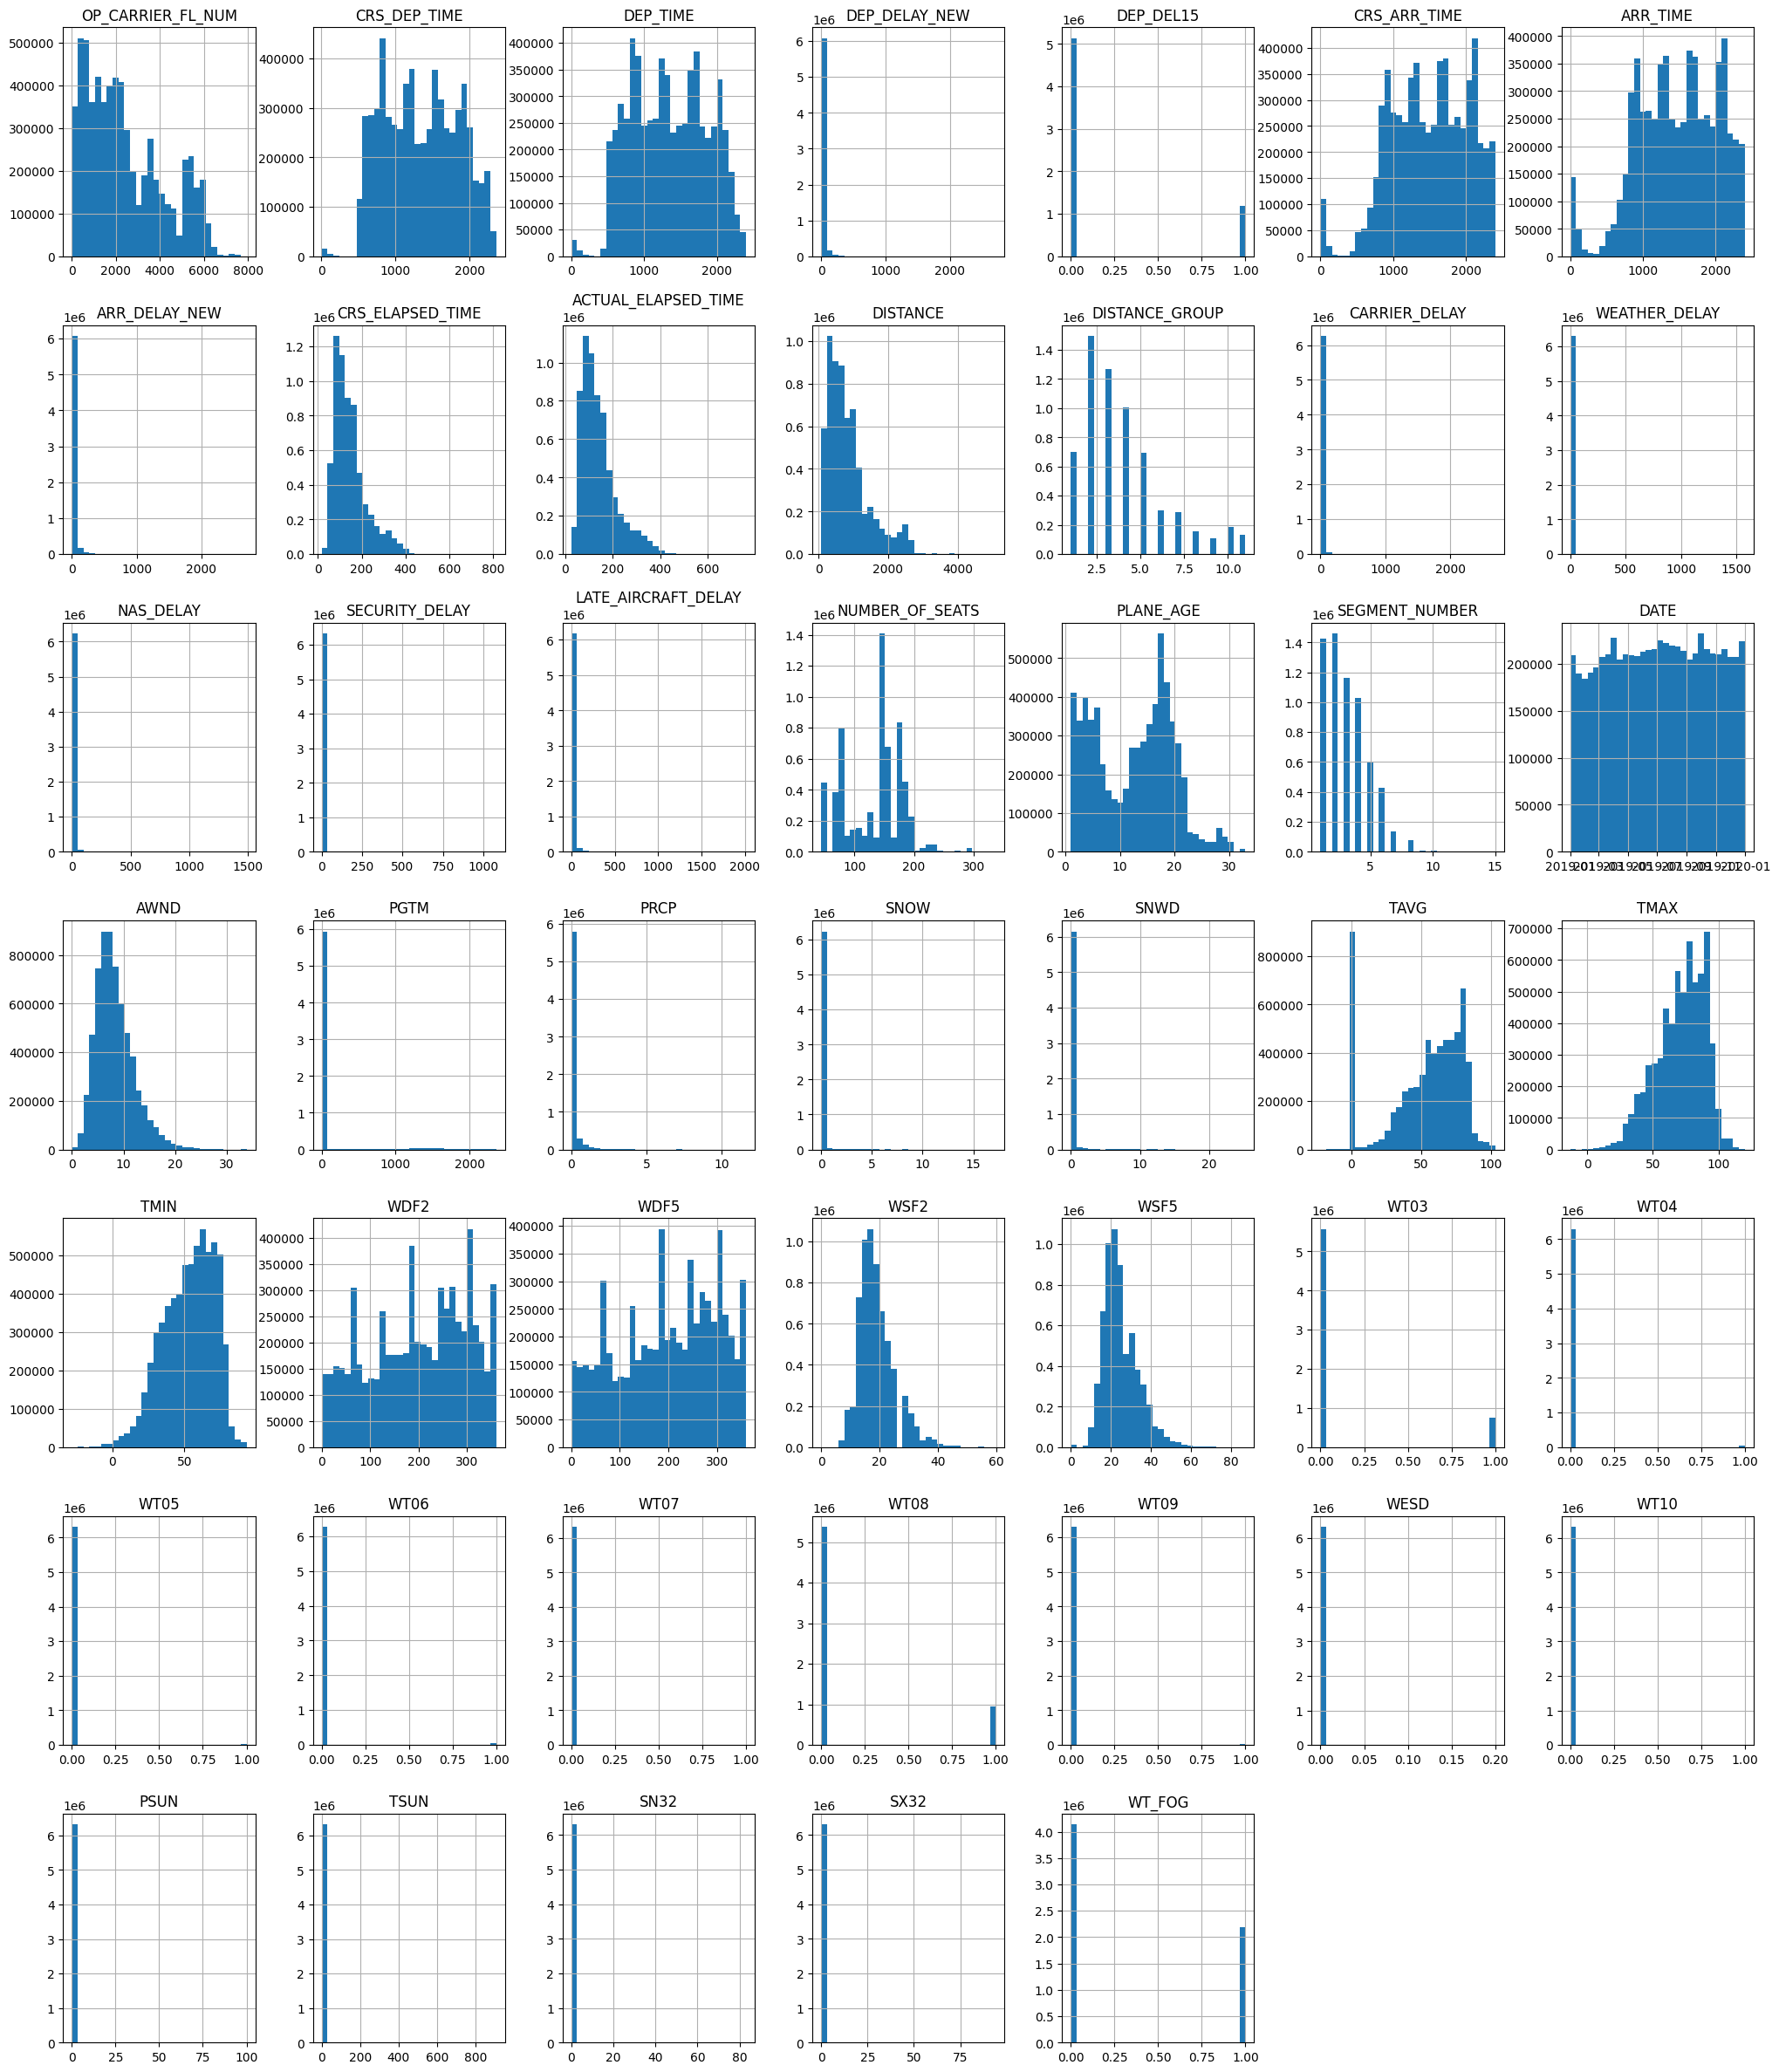

In [20]:
df.hist(bins=30, figsize=(25, 30))

In [22]:
df['SN32'].value_counts(normalize=True) * 100

SN32
0.0     99.628638
80.0     0.037304
81.0     0.028879
79.0     0.021054
78.0     0.021023
54.0     0.021023
82.0     0.018778
55.0     0.017593
56.0     0.013831
76.0     0.013815
73.0     0.012392
59.0     0.012234
52.0     0.011286
58.0     0.009737
68.0     0.009120
72.0     0.008804
69.0     0.008757
53.0     0.008694
70.0     0.007840
60.0     0.007619
64.0     0.007287
51.0     0.006971
75.0     0.006497
49.0     0.005959
61.0     0.005517
63.0     0.005358
74.0     0.004537
57.0     0.004426
83.0     0.004331
67.0     0.004220
50.0     0.004205
77.0     0.003367
48.0     0.002671
46.0     0.002592
71.0     0.002245
62.0     0.002150
66.0     0.002102
45.0     0.002071
65.0     0.001944
44.0     0.001565
47.0     0.001565
Name: proportion, dtype: float64

In [25]:
df.shape

(6326444, 63)

In [ ]:
target_variable = 'DEP_DEL15'
correlation_with_target = df.corr()[target_variable].sort_values(ascending=False)

In [ ]:
df['DEP_TIME_BLK'].head()

0    1000-1059
1    0800-0859
2    1000-1059
3    0600-0659
4    0800-0859
Name: DEP_TIME_BLK, dtype: object

In [ ]:
df['DEP_DELAY_NEW'].value_counts().sum

<bound method Series.sum of DEP_DELAY_NEW
0.0       4255785
1.0        154415
2.0        120361
3.0        105427
4.0         94497
5.0         86580
6.0         77464
7.0         70740
8.0         65560
9.0         60574
10.0        57159
11.0        52045
12.0        48338
13.0        45328
14.0        42948
15.0        40865
16.0        37756
17.0        35719
18.0        33797
19.0        31749
20.0        31001
21.0        28635
22.0        27075
23.0        26069
24.0        24877
25.0        24504
26.0        23174
27.0        22078
28.0        20917
29.0        20407
30.0        19831
31.0        18616
32.0        17944
33.0        17158
34.0        16911
35.0        16445
36.0        15104
37.0        14980
38.0        14152
39.0        14130
40.0        13709
41.0        13102
42.0        12735
43.0        12370
44.0        12144
45.0        11820
46.0        11407
47.0        11022
48.0        10643
49.0        10355
50.0        10174
51.0         9800
53.0         9461
52.0

## Preprocessing

In [ ]:
print("Let's preprocess")
print("NO")

Let's preprocess


## Training

## Evaluation